In [1]:
import sys
sys.path.append("../code/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from create_matrix import *
from common import create_region_df_dfc_static

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']

import os

In [4]:
def get_tensor_appliance(df, dfc, appliance):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] ]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 1, stop - start))
    M, N, O = tensor.shape
    return tensor

In [5]:
def get_tensor(df):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())

    #dfc = df.copy()

    df = df[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [73]:
region = 'SanDiego'
year = 2014

df, dfc, tensor, static_region = create_region_df_dfc_static(region, year, start=1, stop=13)

In [74]:
df[['hvac_7','area']].dropna().corr()

,hvac_7,area
hvac_7,1.000000,0.456501
area,0.456501,1.000000


In [75]:
df.columns

Index([u'hvac_1', u'hvac_2', u'hvac_3', u'hvac_4', u'hvac_5', u'hvac_6',
       u'hvac_7', u'hvac_8', u'hvac_9', u'hvac_10',
       ...
       u'dr_11', u'dr_12', u'num_rooms', u'area', u'num_bedrooms',
       u'num_floors', u'area_first', u'area_second', u'area_third',
       u'total_occupants'],
      dtype='object', length=128)

In [76]:
o = {}
for appliance in APPLIANCES_ORDER[:]:
    o[appliance] = {}
    for month in range(1, 13):
        o[appliance][month] = {}
        for i, e in enumerate(['area','total_occupants','num_rooms']):
            o[appliance][month][e] = df[['{}_{}'.format(appliance, month),e]].dropna().corr().values[0, 1]

In [80]:
df[['{}_{}'.format(appliance, month),e]].dropna()

,oven_12,num_rooms
1731,10.999383,4.0
2606,23.984732,4.0
5938,1.089383,3.0
7062,0.000000,4.0
8061,18.580584,3.0
8342,14.541217,3.0


In [77]:
%matplotlib inline

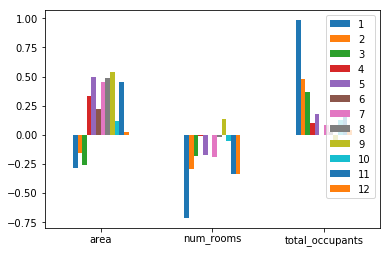

In [78]:
pd.DataFrame(o['hvac']).plot(kind='bar',rot=0)

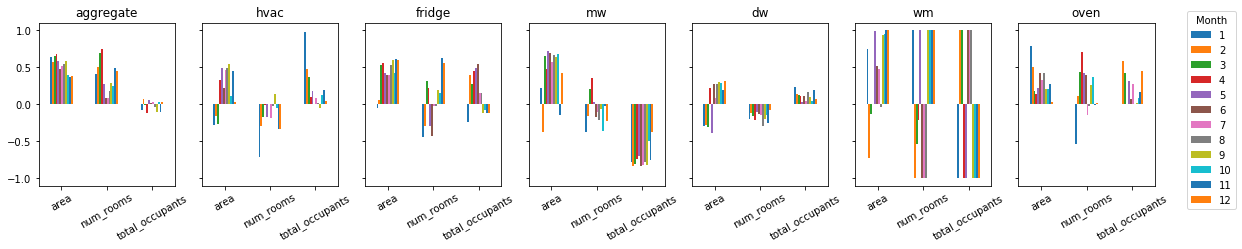

In [79]:
fig, ax = plt.subplots(ncols=7, figsize=(20, 3), sharey=True)
for col, appliance in enumerate(APPLIANCES_ORDER):
    pd.DataFrame(o[appliance]).plot(kind='bar',rot=30, legend=False, ax=ax[col], title=appliance)
plt.legend(bbox_to_anchor=(1.2, 1.1), title='Month')


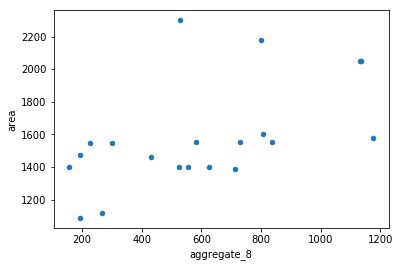

In [85]:
appliance='aggregate'
month = 8
e= 'area'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)

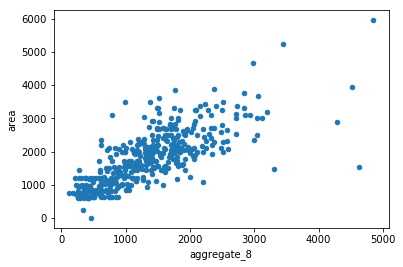

In [70]:
appliance='aggregate'
month = 8
e= 'area'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)